<a href="https://colab.research.google.com/github/alex-trindade/DataScience/blob/main/Analisando_os_Dados_do_Airbnb_Barcelona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Barcelona*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Barcelona, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [80]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [81]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/spain/catalonia/barcelona/2021-12-07/visualisations/listings.csv')

# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.40556,2.17262,Entire home/apt,102,1,22,2021-10-25,0.21,19,15,1,HUTB-002062
1,23197,Forum CCIB DeLuxe★Spacious &Elegant★Large Balcony,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.41291,2.22063,Entire home/apt,220,3,53,2021-10-27,0.41,2,46,1,HUTB-005057
2,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40566,2.17015,Entire home/apt,144,2,63,2020-02-22,0.50,3,7,0,HUTB-001722
3,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Andres,Ciutat Vella,el Barri Gòtic,41.37978,2.17623,Entire home/apt,214,4,159,2021-11-15,1.17,2,149,10,HUTB-001506
4,35318,Luxury room with private bathroom and balcony,152070,Michel,Ciutat Vella,el Barri Gòtic,41.38170,2.17730,Private room,93,3,242,2019-05-12,1.89,1,148,0,NaN


## Análise dos Dados


**Dicionário das variáveis** ([Disnponível aqui ](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?usp=sharing))
* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias.

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [82]:
# identificar o volume de dados do DataFrame
print(f"Entradas:\t {df.shape[0]}")
print(f"Variáveis:\t {df.shape[1]}\n")
print("Tipos das Variáveis\n")

# verificar o tipos de variáveis do dataset
display(df.dtypes)


Entradas:	 15707
Variáveis:	 18

Tipos das Variáveis



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [83]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()).sort_values(ascending=False) / df.shape[0] * 100

license                           35.786592
reviews_per_month                 26.001146
last_review                       26.001146
host_name                          0.229197
name                               0.063666
minimum_nights                     0.000000
number_of_reviews_ltm              0.000000
availability_365                   0.000000
calculated_host_listings_count     0.000000
number_of_reviews                  0.000000
id                                 0.000000
room_type                          0.000000
longitude                          0.000000
latitude                           0.000000
neighbourhood                      0.000000
neighbourhood_group                0.000000
host_id                            0.000000
price                              0.000000
dtype: float64

* license possui quase 36% de dados ausentes;
* reviews_per_month e last_review possuem quase 27% de dados ausentes;

Porém esses dados não vão influenciar nossa análise.


### **Q3. Qual o tipo de distribuição das variáveis?** 

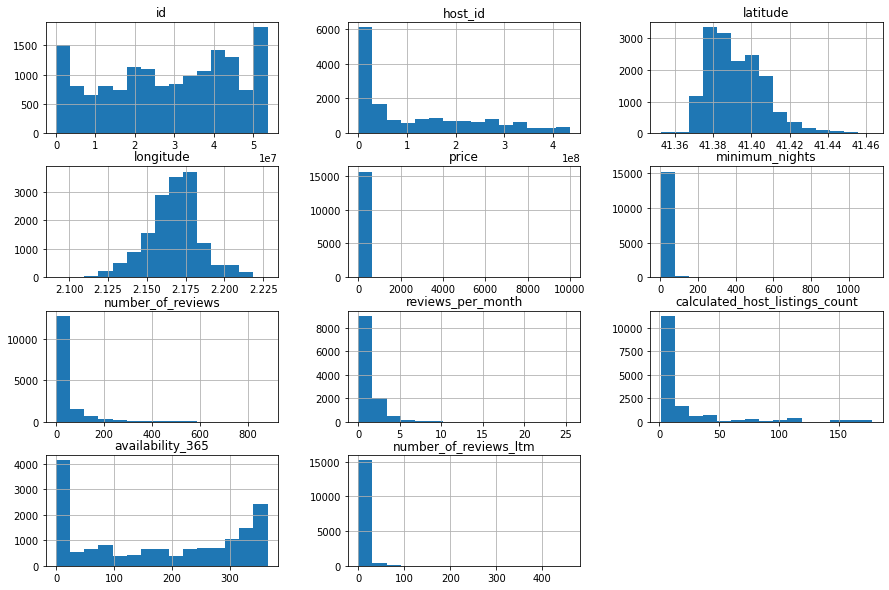

In [84]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));


### **Q4. Qual a média dos preços de aluguel?**

In [85]:
# ver a média da coluna `price``
df.price.mean()

98.89947157318393

### **Q5. Há *outliers* presentes?**
Podemos verificar que *'price'*,*'minimum_nights'* possuem valores com outlayers.

Podemos verificar com o método describe() para as variáveis numéricas.

In [86]:
#Selecionar somente as variaveis numericas
numericas = [x for x in df.dtypes.keys() if df.dtypes[x] in ['int64','float64']]
df[numericas].describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.570700e+04,1.570700e+04,15707.000000,15707.000000,15707.000000,15707.000000,15707.000000,11623.000000,15707.000000,15707.000000,15707.000000
mean,2.868094e+07,1.200667e+08,41.392246,2.167439,98.899472,14.435602,35.818234,1.073293,18.430063,174.710511,5.128796
std,1.635100e+07,1.256574e+08,0.014481,0.017498,217.637472,36.058820,69.285212,1.278548,35.367392,138.378355,11.548977
min,1.867400e+04,3.073000e+03,41.352608,2.091590,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.520036e+07,8.867952e+06,41.380950,2.157330,40.000000,1.000000,0.000000,0.170000,1.000000,13.000000,0.000000
50%,3.000325e+07,6.167434e+07,41.389720,2.168620,68.000000,3.000000,5.000000,0.630000,3.000000,179.000000,0.000000
75%,4.285531e+07,2.207932e+08,41.401880,2.177600,110.000000,30.000000,38.000000,1.570000,16.000000,316.000000,5.000000
max,5.371388e+07,4.343499e+08,41.463060,2.227710,9999.000000,1124.000000,883.000000,25.490000,178.000000,365.000000,460.000000


Podemos verificar que a média de preços é  98.89 e o maior preço é 9999 euros, e metade dos imóveis estão na faixa de 68 euros, como também temos  preços = 0. Podemos ver ainda imóveis com mínimo de noites acima de 1000. 

In [87]:
#Vamos criar um ponto de corte para os precos
q1_price = df.price.quantile(0.25)
q3_price = df.price.quantile(0.75)
IQR_price = q3_price - q1_price
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print(f'Variável price=> Q1={q1_price}, Q3={q3_price}, IQR={IQR_price}, Limite superior={sup_price}, Limite inferior={inf_price}')

#Vamos criar um ponto de corte para quantidade minimas de noites
q1_minimum_nights = df.minimum_nights.quantile(0.25)
q3_minimum_nights = df.minimum_nights.quantile(0.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print(f'Variável minimum_nights=> Q1={q1_minimum_nights}, Q3={q3_minimum_nights}, IQR={IQR_minimum_nights}, Limite superior={sup_minimum_nights}, Limite inferior={inf_minimum_nights}')


Variável price=> Q1=40.0, Q3=110.0, IQR=70.0, Limite superior=215.0, Limite inferior=-65.0
Variável minimum_nights=> Q1=1.0, Q3=30.0, IQR=29.0, Limite superior=73.5, Limite inferior=-42.5


Boxplot para minimum_nights

minimum_nights: valores acima de 73.5 dias:
452 entradas
2.878%


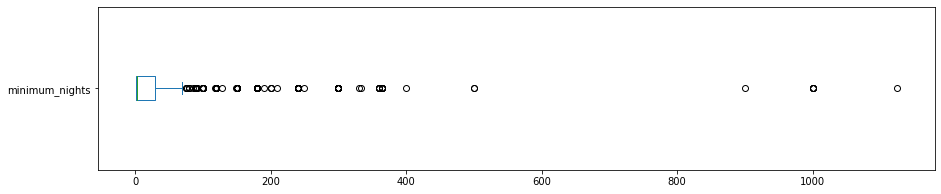

In [88]:
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))

# ver quantidade de valores acima de sup_minimum_nights para minimum_nights
print(f"minimum_nights: valores acima de {sup_minimum_nights} dias:")
print(f"{len(df[df.minimum_nights > sup_minimum_nights])} entradas")
print(f"{len(df[df.minimum_nights > sup_minimum_nights]) / df.shape[0]*100:.4}%")

Boxplot para price

price: valores acima de 215.0 a valores = 0:
1011 entradas
6.437%


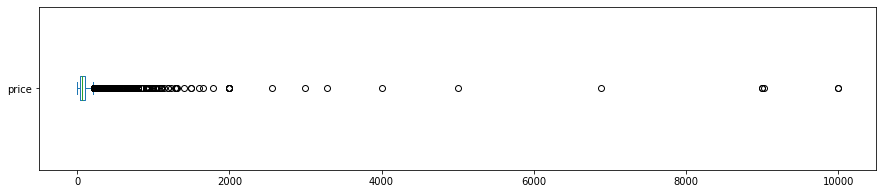

In [89]:
df.price.plot(kind='box', vert=False, figsize=(15, 3))

# ver quantidade de valores acima de sup_minimum_nights para minimum_nights
print(f"price: valores acima de {sup_price} a valores = 0:")
print(f"{len(df[df.price > sup_price])+len(df[df.price == 0])} entradas")
print(f"{(len(df[df.price > sup_price])+len(df[df.price == 0])) / df.shape[0]*100:.4}%")

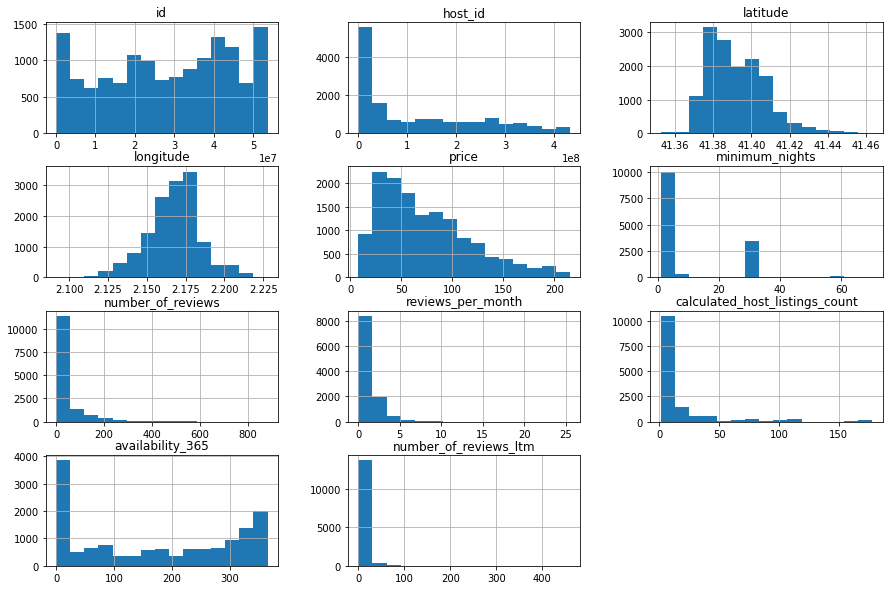

In [90]:
#Eliminando linhas com outlayers
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > sup_price].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > sup_minimum_nights].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

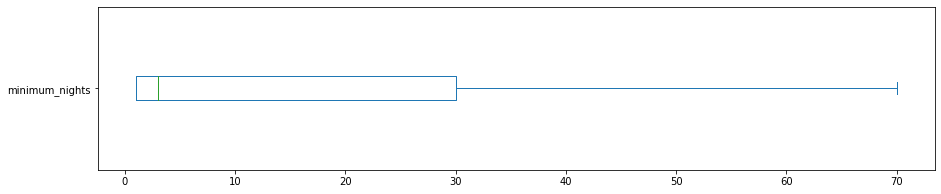

In [91]:
df_clean.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3));


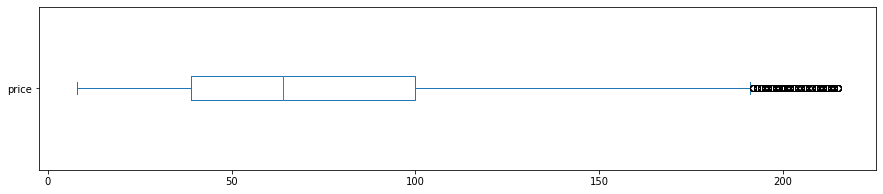

In [92]:
df_clean.price.plot(kind='box', vert=False, figsize=(15, 3));

### **Q6. Qual a correlação existente entre as variáveis**

In [93]:
# criar uma matriz de correlação
numericas = [x for x in df_clean.dtypes.keys() if df_clean.dtypes[x] in ['int64','float64']]
corr = df_clean[numericas].corr()

# mostrar a matriz de correlação
display(corr)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
id,1.000000,0.566180,-0.037642,0.017570,-0.045866,0.145138,-0.499122,0.028726,0.125406,0.106687,-0.067569
host_id,0.566180,1.000000,-0.036012,0.012218,-0.053221,-0.010773,-0.273123,0.047599,-0.099783,0.036399,-0.029517
latitude,-0.037642,-0.036012,1.000000,0.298851,-0.055446,-0.024080,-0.014779,-0.056951,-0.009863,-0.003768,-0.037106
longitude,0.017570,0.012218,0.298851,1.000000,0.018601,0.038467,-0.010717,-0.001359,0.004330,-0.014715,0.020714
price,-0.045866,-0.053221,-0.055446,0.018601,1.000000,-0.172523,0.085053,0.049510,0.220247,0.242226,0.064236
minimum_nights,0.145138,-0.010773,-0.024080,0.038467,-0.172523,1.000000,-0.218494,-0.275127,0.071362,0.064548,-0.222154
number_of_reviews,-0.499122,-0.273123,-0.014779,-0.010717,0.085053,-0.218494,1.000000,0.649057,-0.102304,0.068503,0.523995
reviews_per_month,0.028726,0.047599,-0.056951,-0.001359,0.049510,-0.275127,0.649057,1.000000,-0.053914,0.127538,0.722463
calculated_host_listings_count,0.125406,-0.099783,-0.009863,0.004330,0.220247,0.071362,-0.102304,-0.053914,1.000000,0.221653,-0.027427
availability_365,0.106687,0.036399,-0.003768,-0.014715,0.242226,0.064548,0.068503,0.127538,0.221653,1.000000,0.159936


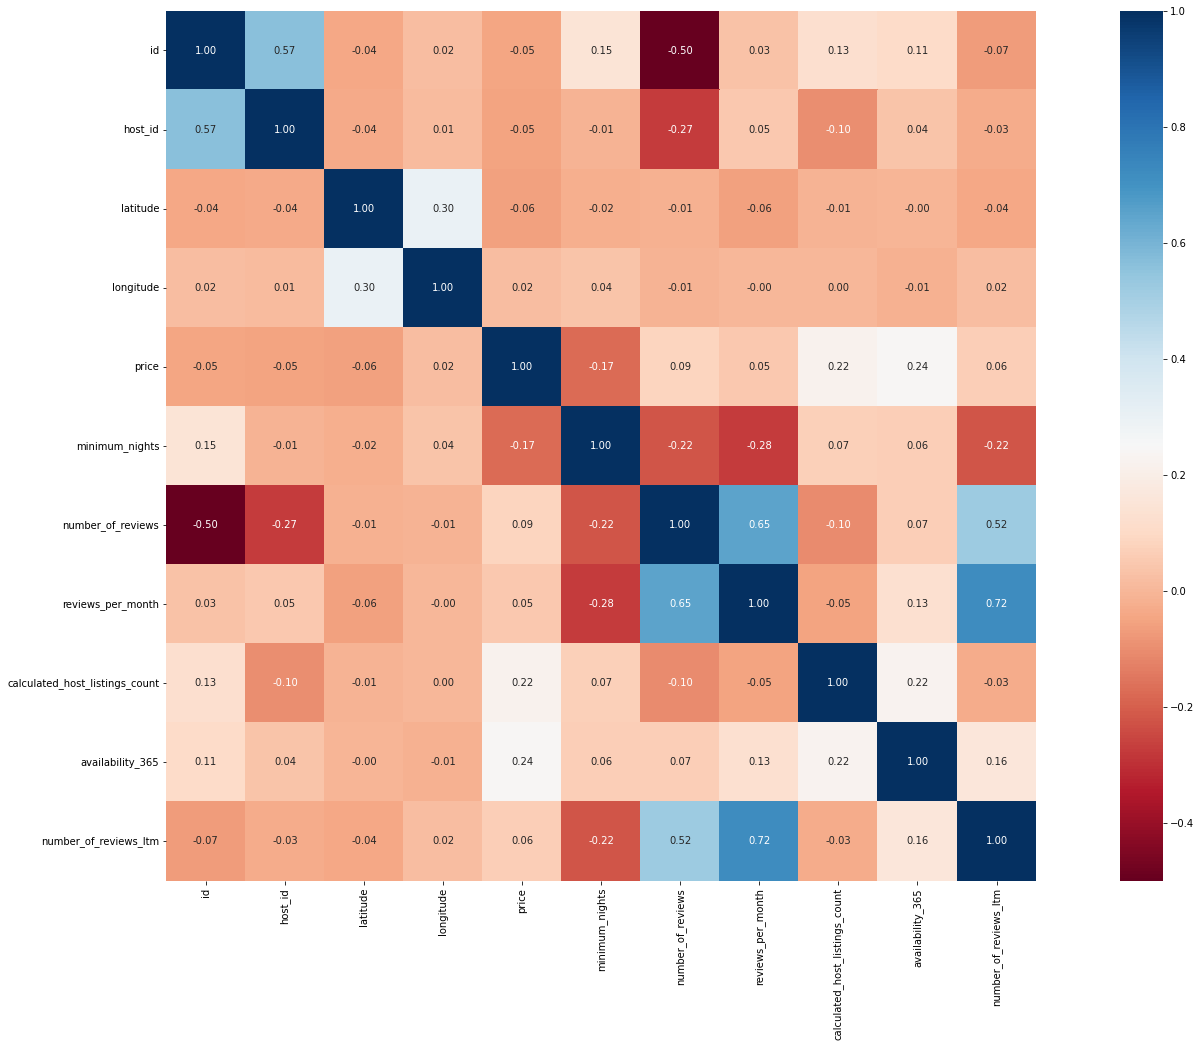

In [94]:
# plotar um heatmap a partir das correlações
plt.subplots(figsize=(30, 16))
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

In [95]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    7451
Private room       6455
Hotel room          183
Shared room         168
Name: room_type, dtype: int64

In [96]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts()/df_clean.shape[0]*100

Entire home/apt    52.262047
Private room       45.276005
Hotel room          1.283580
Shared room         1.178369
Name: room_type, dtype: float64

### **Q8. Qual a localidade mais cara do dataset?**
Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.


In [97]:
# ver preços por bairros, na média
df_clean.groupby('neighbourhood').price.mean().sort_values(ascending=False)
bairros_media =   df_clean.groupby('neighbourhood').price.mean().sort_values(ascending=False)
bairros_minimo =  df_clean.groupby('neighbourhood').price.min().sort_values(ascending=False)
bairros_maximo =  df_clean.groupby('neighbourhood').price.max().sort_values(ascending=False)
bairros_qt     =  df_clean['neighbourhood'].value_counts() 


In [98]:
df_bairros = (pd.DataFrame([bairros_minimo,  bairros_media, bairros_maximo, bairros_qt], index=['Mínimo','Média','Máximo','Qt']).transpose()).sort_values(by='Máximo',ascending=False)
df_bairros

,Mínimo,Média,Máximo,Qt
"Sant Pere, Santa Caterina i la Ribera",10.0,71.258101,215.0,895.0
la Dreta de l'Eixample,9.0,97.062150,215.0,1609.0
el Barri Gòtic,11.0,72.908092,214.0,1001.0
Sant Gervasi - Galvany,13.0,86.957265,214.0,234.0
"Vallvidrera, el Tibidabo i les Planes",25.0,87.400000,214.0,20.0
...,...,...,...,...
Montbau,15.0,25.700000,60.0,10.0
la Guineueta,11.0,33.900000,56.0,10.0
Canyelles,30.0,30.000000,30.0,1.0
Torre Baró,25.0,25.000000,25.0,1.0


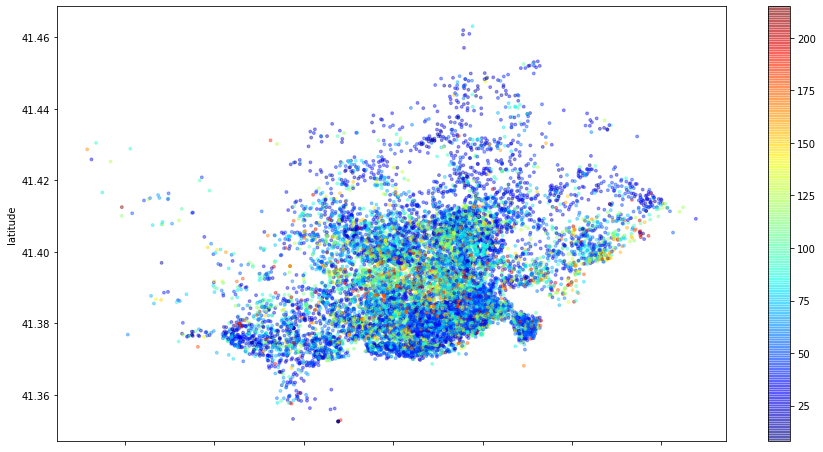

In [99]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(15,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [100]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

10.156905379813425

### **Q7. Qual a média de preço por tipo de imóvel?**

In [101]:
df_clean.groupby('room_type').price.mean().sort_values(ascending=False)

room_type
Hotel room         98.677596
Entire home/apt    96.607569
Private room       48.890473
Shared room        37.595238
Name: price, dtype: float64

## Conclusões


Pode-se concluir que Barcelona apesar de ser uma cidade turística e muito famosa, possuiu opções de imóveis para todos os bolsos. A média de noites que os imóveis são alugados é de aproiximadamente 10, na localidade mais cara *Sant Pere, Santa Caterina i la Ribera* você iria gastar uma média de 712,00 euros ( 3712,00 reais na cotação de hoje), e caso resolvesse ficar na opção mais cara sua conta iria subir para 2150,00 euros (11.201,00 reais na cotação atual).

Mais da metade dos imóveis alugados são do tipo casa ou apartamento inteiro, a média de preço deste tipo de imóvel é de 96,00 euros. A opção mais em conta seria um quarto compartilhado por com uma média de 38,00 euros.